<h3> Regression Analysis - What Makes Someone Spend More?

<h4> Importing The Required Libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h4> Taking A Look At The Data

In [2]:
data =pd.read_csv("Ecommerce Customers")
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [19]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


The data doesn't seem to require any cleaning. At first glance we can't really make out the relationships among the variables. Lets graphically explore the data.

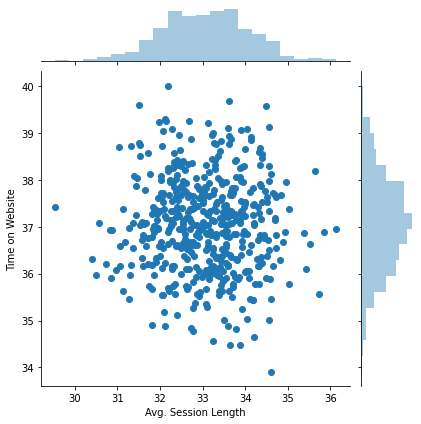

In [20]:
sns.jointplot(x= "Avg. Session Length", y="Time on Website", data= data);

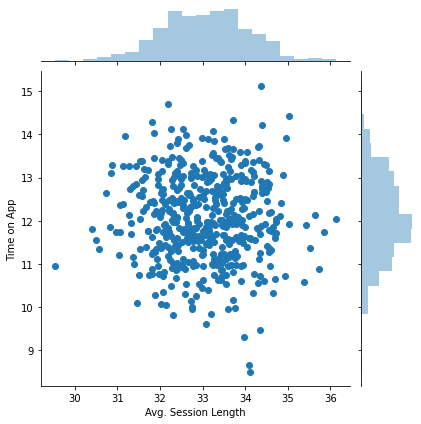

In [21]:
sns.jointplot(x= "Avg. Session Length", y="Time on App", data= data);

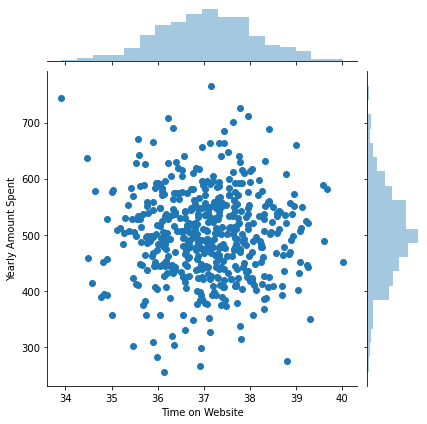

In [22]:
sns.jointplot(x= "Time on Website", y="Yearly Amount Spent", data= data);

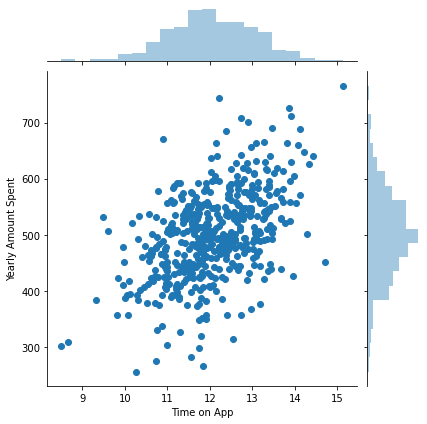

In [23]:
sns.jointplot(x= "Time on App", y= "Yearly Amount Spent", data= data);

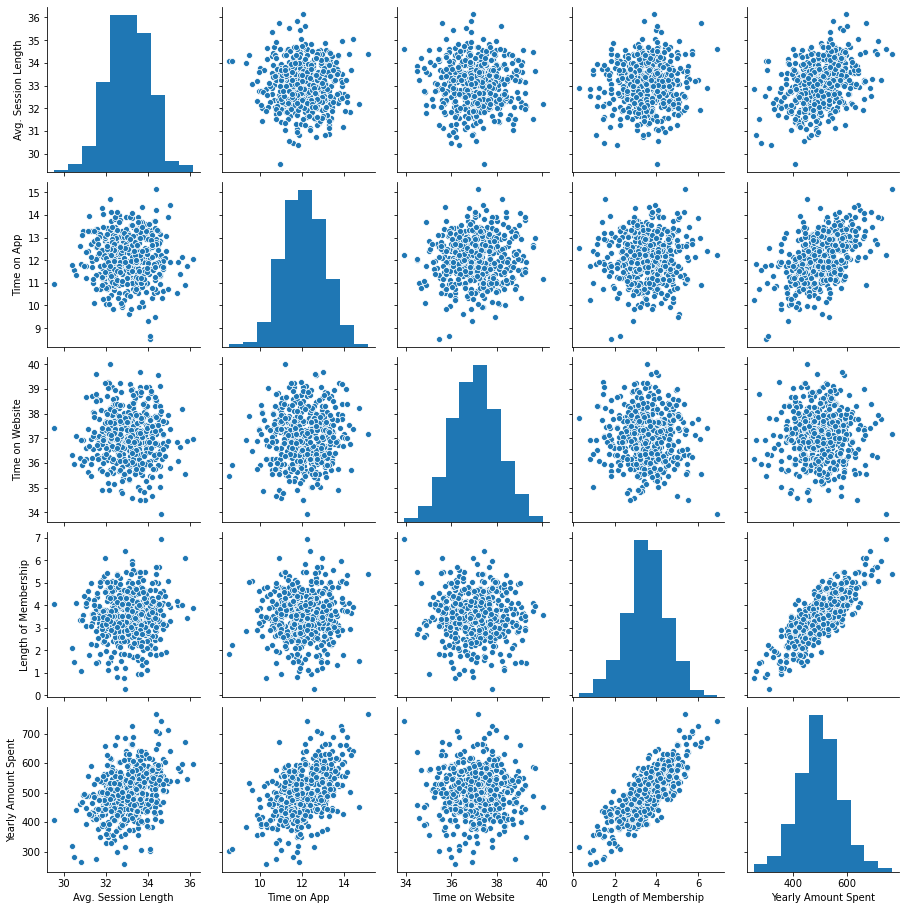

In [24]:
sns.pairplot(data)

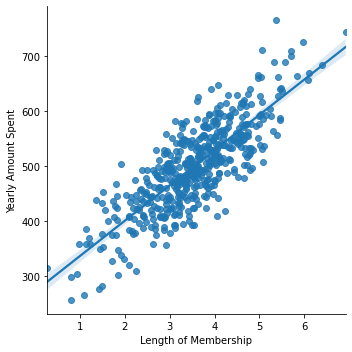

In [25]:
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data = data)

<h3> Setting Up The Regression Model

In [26]:
x = data[["Avg. Session Length", "Time on App","Time on Website","Length of Membership"]]
y = data["Yearly Amount Spent"]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 )

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(x_train, y_train)

LinearRegression()

In [30]:
lr.coef_

array([26.2435245 , 39.11928533,  0.46741945, 61.80673071])

In [31]:
predictions =lr.predict(x_test)

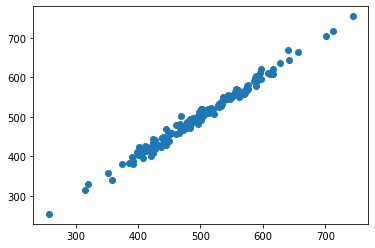

In [32]:
plt.scatter(y_test, predictions);

<h3> Evaluating The Model

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.5776863312301765
MSE: 92.38227026642781
RMSE: 9.611569604722623


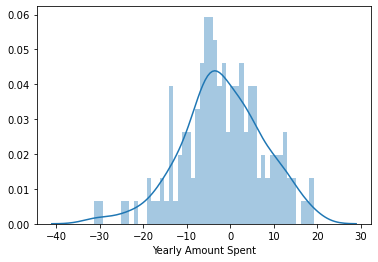

In [34]:
sns.distplot((y_test-predictions),bins=50);

The absolute errors of the model are very low. The results of the model are normally distributed. We can conclude that the model is fairly accurate.

<h3> Conclusion

In [37]:
coeffecients = pd.DataFrame(lr.coef_,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,26.243525
Time on App,39.119285
Time on Website,0.467419
Length of Membership,61.806731


We see that for a unit increse in the Length of Membership will lead to an increase in spending by 61 dollars. Similarly, spending more time on the app will lead an increase of 39 dollars. The company should focus on retaining their members longer and secondly work on improving their app. Investing on their website is more or less useless.